In [1]:
import pandas as pd
import numpy as np
from data_path import data_path
dataPath = data_path.dataPath

data = pd.read_parquet(dataPath + 'train_series.parquet')
labels = pd.read_csv(dataPath + 'train_events.csv')

display(data)
display(labels)

In [ ]:
sample_size = 10
data_sample = data[data["series_id"].isin(data["series_id"].sample(sample_size))]
data_sample = data_sample.merge(labels, on=['series_id', "step", "timestamp"], how='left')
data_sample_only_labels = data_sample[np.logical_not(data_sample["event"].isna())]

display(data_sample)
display(data_sample_only_labels)

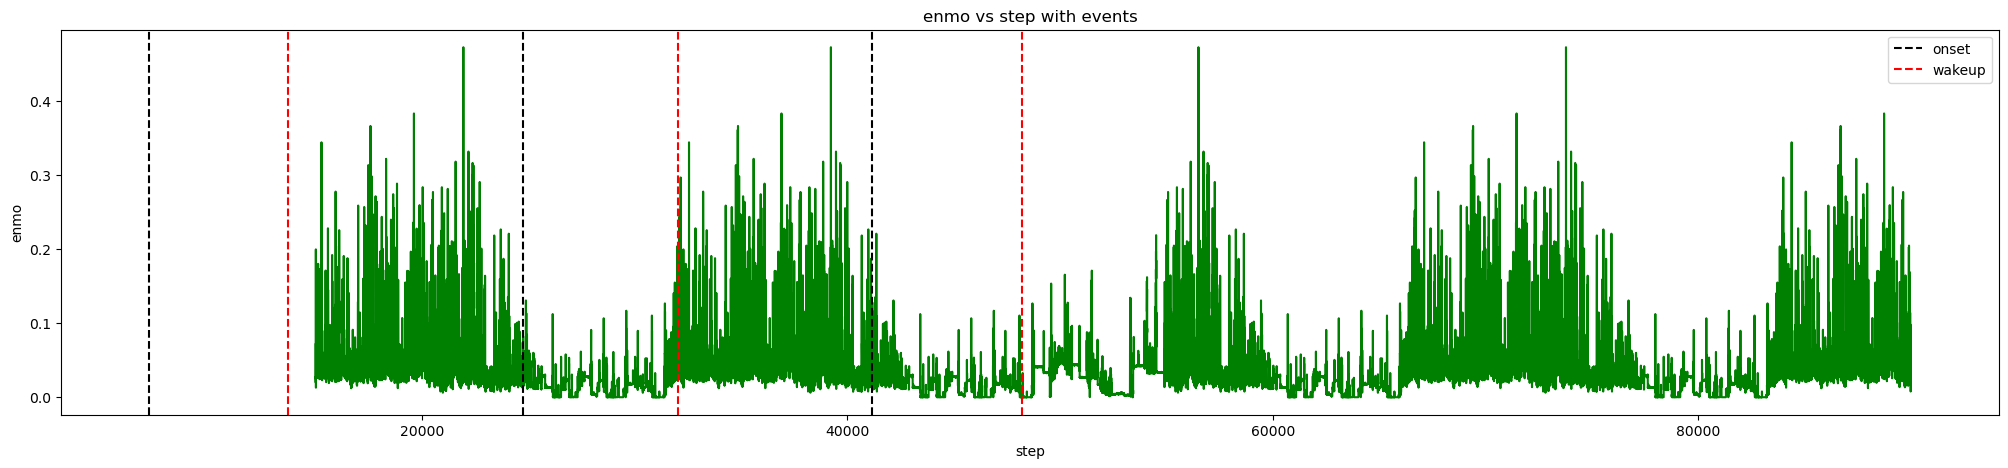

In [ ]:
#graph for enmo where black events are onset and red are wakeuop
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 5))
plt.xlabel('step')
plt.ylabel('enmo')
plt.title('enmo vs step with events')


plt.plot(data_sample["step"][15000:90000], data_sample["enmo"][15000:90000], color='g')
#plt.plot(data_sample["step"][:50000], data_sample["anglez"][:50000], color='b')

plt.axvline(data_sample_only_labels["step"].values[0], color='black', linestyle='--', label="onset")
plt.axvline(data_sample_only_labels["step"].values[1], color='r', linestyle='--', label="wakeup")
plt.legend()

for i in range(2, 6):
    if i % 2 == 0:
        plt.axvline(data_sample_only_labels["step"].values[i], color='black', linestyle='--')
    else:
        plt.axvline(data_sample_only_labels["step"].values[i], color='r', linestyle='--')



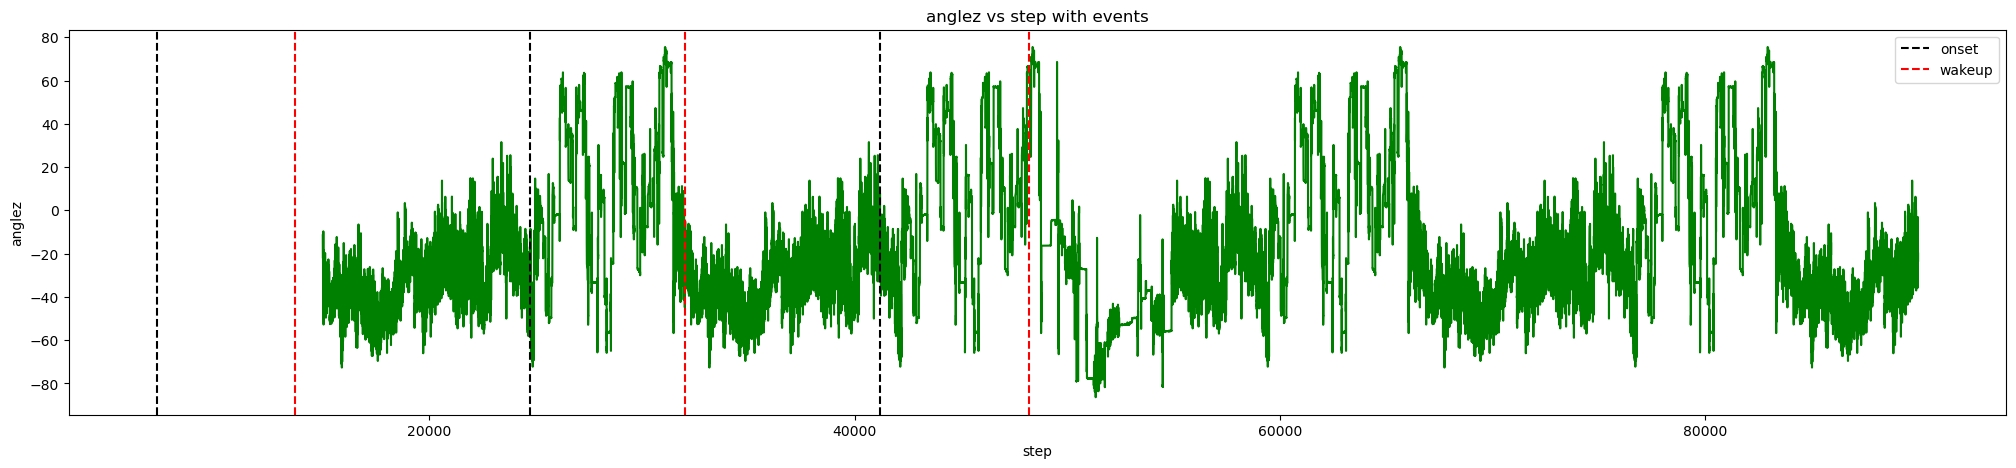

In [ ]:
#same graph as above for anglez
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 5))
plt.xlabel('step')
plt.ylabel('anglez')
plt.title('anglez vs step with events')


plt.plot(data_sample["step"][15000:90000], data_sample["anglez"][15000:90000], color='g')
#plt.plot(data_sample["step"][:50000], data_sample["anglez"][:50000], color='b')

plt.axvline(data_sample_only_labels["step"].values[0], color='black', linestyle='--', label="onset")
plt.axvline(data_sample_only_labels["step"].values[1], color='r', linestyle='--', label="wakeup")
plt.legend()

for i in range(2, 6):
    if i % 2 == 0:
        plt.axvline(data_sample_only_labels["step"].values[i], color='black', linestyle='--')
    else:
        plt.axvline(data_sample_only_labels["step"].values[i], color='r', linestyle='--')

In [ ]:
import datetime
import calendar

def timestamp_to_epcoch_day(timestamp):
    if type(timestamp) is str:
        timestamp = datetime.datetime.strptime(timestamp[0:-5], '%Y-%m-%dT%H:%M:%S')
    return calendar.timegm(timestamp.timetuple()) % (3600 * 24)

data_time_stamps = data_sample.timestamp.apply(timestamp_to_epcoch_day)
labels_time_stamps = data_sample_only_labels.timestamp.apply(timestamp_to_epcoch_day)

display(data_time_stamps)

0          41400
1          41405
2          41410
3          41415
4          41420
           ...  
4636435    82775
4636436    82780
4636437    82785
4636438    82790
4636439    82795
Name: timestamp, Length: 4636440, dtype: int64

c:\Users\yotam\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


<Figure size 2500x500 with 0 Axes>

c:\Users\yotam\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


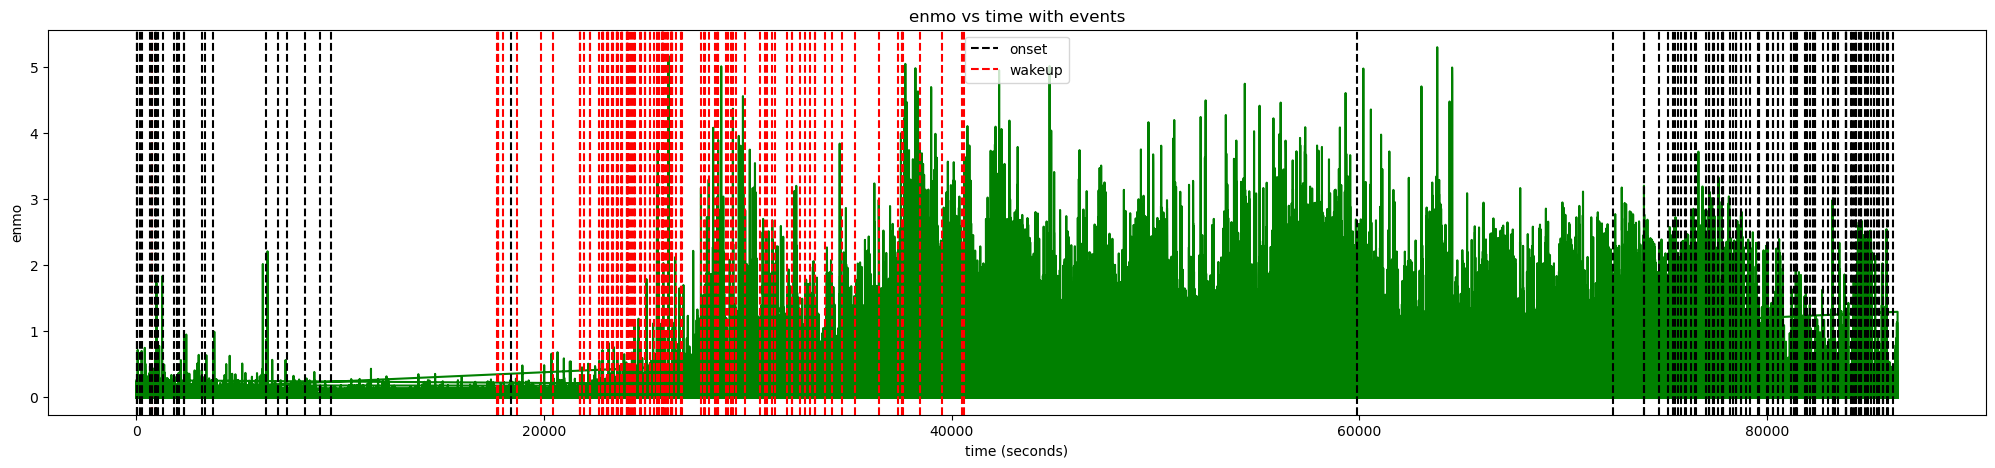

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 5))

#enmo graph with respect to time
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 5))
plt.xlabel('time (seconds)')
plt.ylabel('enmo')
plt.title('enmo vs time with events')


plt.plot(data_time_stamps, data_sample["enmo"], color='g')

plt.axvline(labels_time_stamps.values[0], color='black', linestyle='--', label="onset")
plt.axvline(labels_time_stamps.values[1], color='r', linestyle='--', label="wakeup")
plt.legend()

for i in range(2, len(labels_time_stamps)):
    if i % 2 == 0:
        plt.axvline(labels_time_stamps.values[i], color='black', linestyle='--')
    else:
        plt.axvline(labels_time_stamps.values[i], color='r', linestyle='--')

<Figure size 2500x500 with 0 Axes>

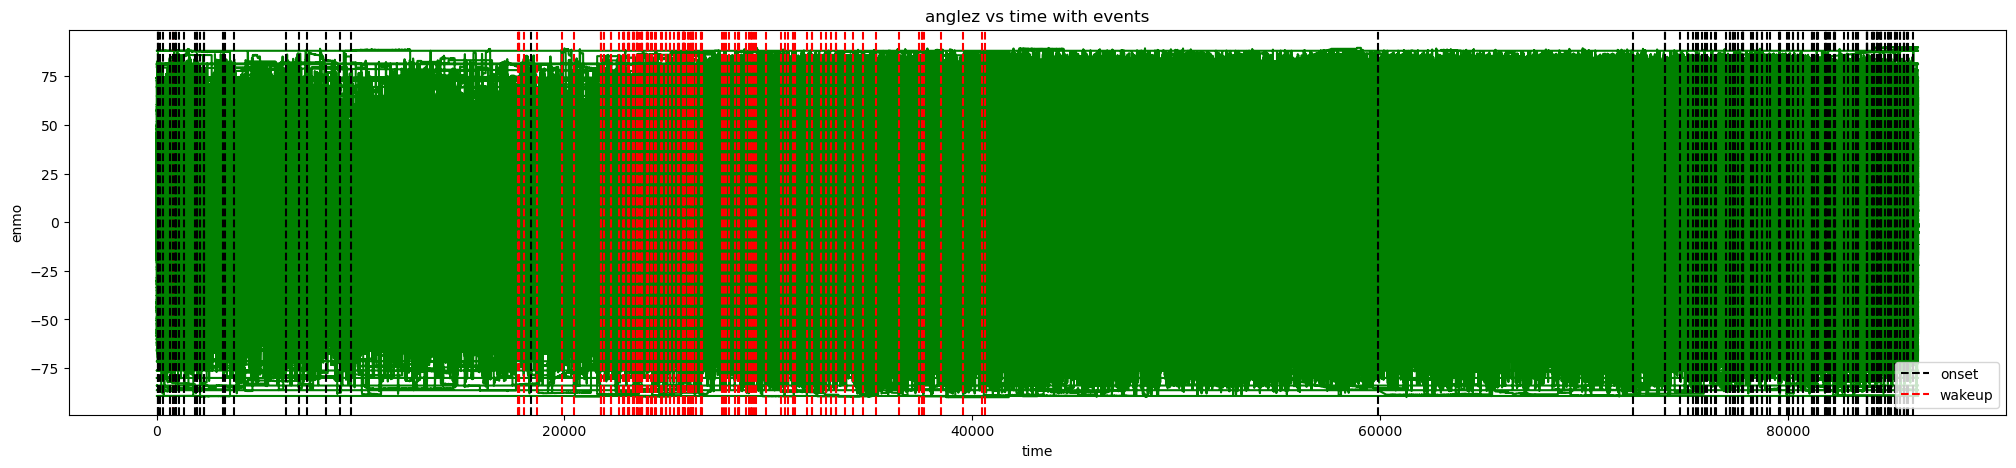

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 5))

#anglez graph with respect to time
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 5))
plt.xlabel('time')
plt.ylabel('enmo')
plt.title('anglez vs time with events')


plt.plot(data_time_stamps, data_sample["anglez"], color='g')

plt.axvline(labels_time_stamps.values[0], color='black', linestyle='--', label="onset")
plt.axvline(labels_time_stamps.values[1], color='r', linestyle='--', label="wakeup")
plt.legend()

for i in range(2, len(labels_time_stamps)):
    if i % 2 == 0:
        plt.axvline(labels_time_stamps.values[i], color='black', linestyle='--')
    else:
        plt.axvline(labels_time_stamps.values[i], color='r', linestyle='--')

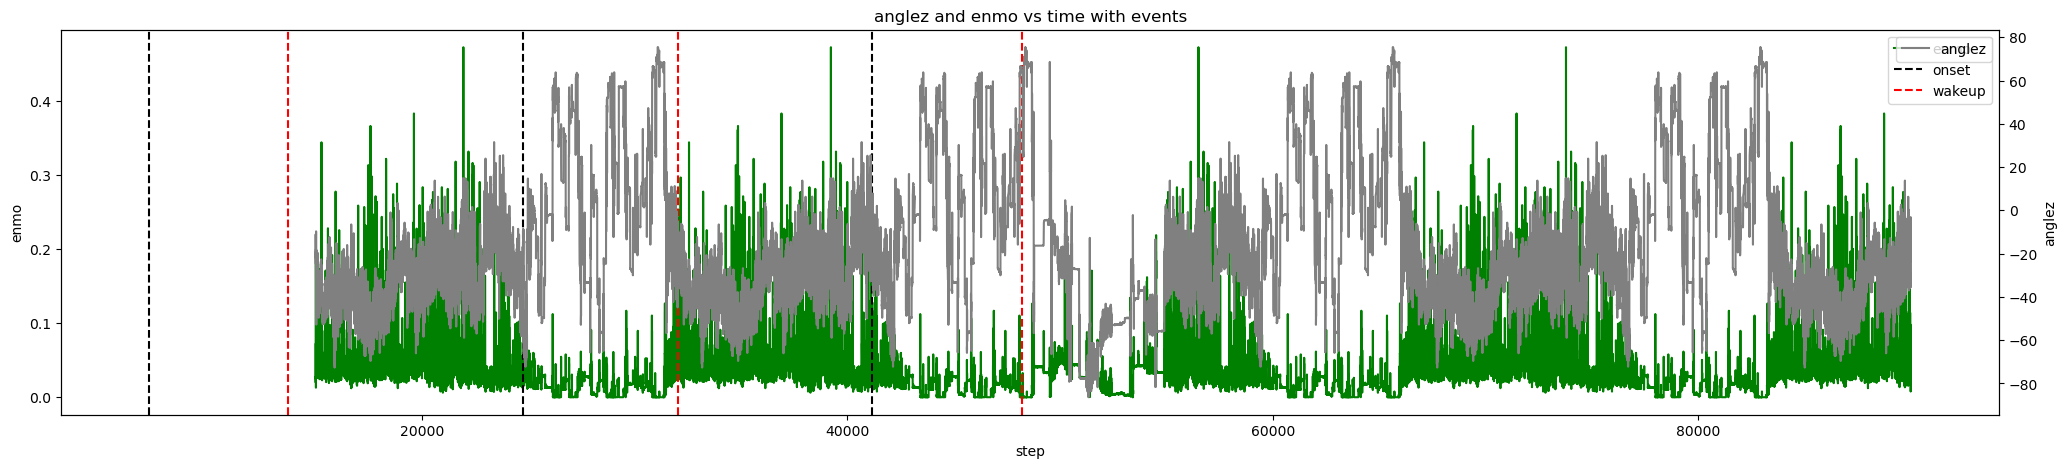

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(25, 5)

ax1.set_xlabel('step')
ax1.set_ylabel('enmo')
ax1.set_title('anglez and enmo vs time with events')

ax1.plot(data_sample["step"][15000:90000], data_sample["enmo"][15000:90000], color='g', label="enmo")

ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('anglez')
ax2.plot(data_sample["step"][15000:90000], data_sample["anglez"][15000:90000], color='gray', label="anglez")




ax1.axvline(data_sample_only_labels["step"].values[0], color='black', linestyle='--', label="onset")
ax1.axvline(data_sample_only_labels["step"].values[1], color='r', linestyle='--', label="wakeup")
ax1.legend()
ax2.legend()

for i in range(2, 6):
    if i % 2 == 0:
        ax1.axvline(data_sample_only_labels["step"].values[i], color='black', linestyle='--')
    else:
        ax1.axvline(data_sample_only_labels["step"].values[i], color='r', linestyle='--')

plt.show()

In [ ]:
def get_30_minute_data(data, labels, night, id, event):
    e = 1 if event == "wakeup" else 0
    data = data[data["series_id"] == id]

    timeFrame = 30 * 60 / 5
    event_step = labels["step"].values[night * 2 + e].item()
    start_time = int(event_step - timeFrame)
    end_time = int(event_step + timeFrame)
    domain = range(start_time, end_time)

    data_in_domain = data[data["step"].isin(domain)]

    return data_in_domain, event_step


In [ ]:
def graph_enmo_and_anglez(data, event_step, event_type):
    fig, ax1 = plt.subplots()
    fig.set_size_inches(15, 5)

    ax1.set_xlabel('step')
    ax1.set_ylabel('enmo')
    ax1.set_title('anglez and enmo vs step 30 minutes before and after ' + event_type )

    ax1.plot(data["step"], data["enmo"], color='g', label="enmo")
    ax1.legend()

    ax1.tick_params(axis='y')
    ax2 = ax1.twinx()

    ax2.set_ylabel('anglez')
    ax2.plot(data["step"], data["anglez"], color='gray', label="anglez")
    ax2.axvline(event_step, color='black', linestyle='--', label=event_type)
    ax2.legend()


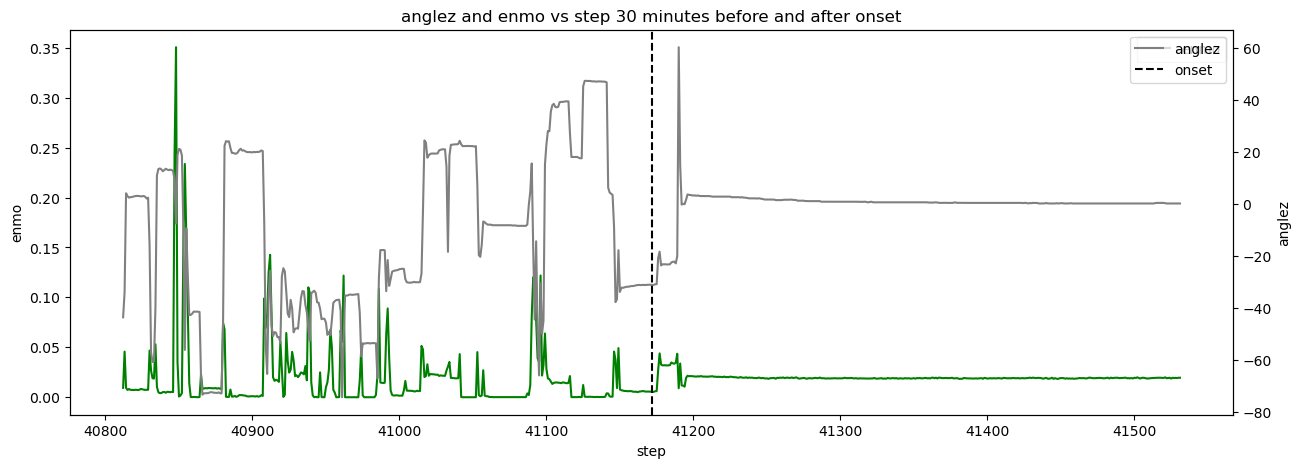

In [ ]:
data_in_domain, event_step = get_30_minute_data(data_sample, data_sample_only_labels, 2, "10f8bc1f7b07", "onset")
graph_enmo_and_anglez(data_in_domain, event_step, "onset")

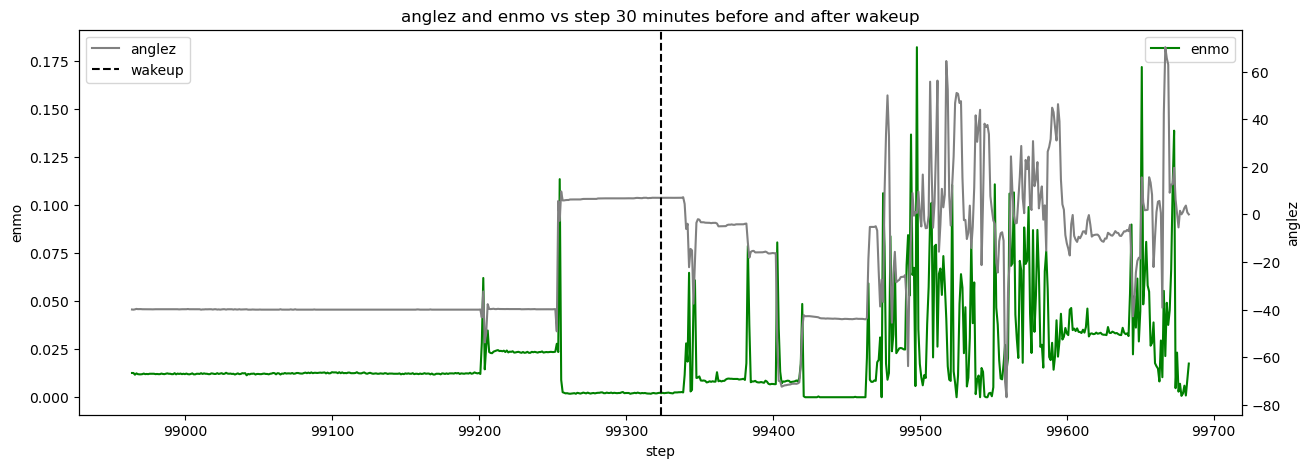

In [ ]:
data_in_domain, event_step = get_30_minute_data(data_sample, data_sample_only_labels, 5, "10f8bc1f7b07", "wakeup")
graph_enmo_and_anglez(data_in_domain, event_step, "wakeup")